# Synthetically generated datasets from TODS

- Source: https://github.com/datamllab/tods/tree/benchmark/benchmark/synthetic
- Description: https://datasets-benchmarks-proceedings.neurips.cc/paper_files/paper/2021/file/ec5decca5ed3d6b8079e2e7e7bacc9f2-Paper-round1.pdf

In [15]:
from typing import List
import matplotlib
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from config import data_raw_folder, data_processed_folder
from timeeval import DatasetManager
from timeeval.datasets import Datasets, DatasetAnalyzer, DatasetRecord

In [16]:
plt.rcParams["figure.figsize"] = (20, 10)

In [17]:
def list_datasets(it):
    if it == "univariate":
        return [
            f for f in (source_folder / "unidataset").iterdir()
            if f.name.startswith("point_") or f.name.startswith("collective_")
        ]
    else:
        return [
            f for f in (source_folder / "multidataset").iterdir()
        ]

def prepare_dataset(dataset_path: Path) -> pd.DataFrame:
    df = pd.read_csv(dataset_path)
    df.index.name = "timestamp"
    df = df.rename(columns={"anomaly": "is_anomaly"})
    df = df.reset_index()
    return df

In [18]:
dataset_collection_name = "TODS-synthetic"
source_folder = Path(data_raw_folder) / "TODS-synthetic"
target_folder = Path(data_processed_folder)

print(f"Looking for source datasets in {Path(source_folder).absolute()} and\nsaving processed datasets in {Path(target_folder).absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


In [19]:
# shared by all datasets
dataset_type = "synthetic"
datetime_index = False
split_at = None
train_is_normal = False
train_type = "unsupervised"

dm = DatasetManager(target_folder)

In [25]:
for input_type in ("univariate", "multivariate"):

    # create target directory
    dataset_subfolder = Path(input_type) / dataset_collection_name
    target_subfolder = target_folder / dataset_subfolder
    target_subfolder.mkdir(parents=True, exist_ok=True)
    print(f"Created directories {target_subfolder}")

    for i, file in enumerate(list_datasets(input_type)):
        print(f"> Processing source dataset {i}: {file.name}")
        dataset_name = file.stem
        test_filename = f"{dataset_name}.test.csv"
        test_path = dataset_subfolder / test_filename
        target_test_filepath = target_subfolder / test_filename
        target_meta_filepath = target_test_filepath.parent / f"{dataset_name}.{Datasets.METADATA_FILENAME_SUFFIX}"

        # Prepare datasets
        if not target_test_filepath.exists() or not target_meta_filepath.exists():
            df_test = prepare_dataset(file)
            df_test.to_csv(target_test_filepath, index=False)
            print(f"  written dataset {i} to disk")
        else:
            df_test = None
            print(f"  skipped writing dataset {i} to disk, because it already exists.")

        # Prepare metadata
        def analyze(df_test):
            da = DatasetAnalyzer((dataset_collection_name, dataset_name), is_train=False, df=df_test)
            da.save_to_json(target_meta_filepath, overwrite=True)
            meta = da.metadata
            print(f"  analyzed test dataset {i}")
            return meta

        if target_meta_filepath.exists():
            try:
                meta = DatasetAnalyzer.load_from_json(target_meta_filepath, train=False)
            except ValueError:
                if df_test is None:
                    df_test = pd.read_csv(target_test_filepath)
                meta = analyze(df_test)
        else:
            meta = analyze(df_test)

        dm.add_dataset(DatasetRecord(
              collection_name=dataset_collection_name,
              dataset_name=dataset_name,
              train_path=None,
              test_path=test_path,
              dataset_type=dataset_type,
              datetime_index=datetime_index,
              split_at=split_at,
              train_type=train_type,
              train_is_normal=train_is_normal,
              input_type=input_type,
              length=meta.length,
              dimensions=meta.dimensions,
              contamination=meta.contamination,
              num_anomalies=meta.num_anomalies,
              min_anomaly_length=meta.anomaly_length.min,
              median_anomaly_length=meta.anomaly_length.median,
              max_anomaly_length=meta.anomaly_length.max,
              mean=meta.mean,
              stddev=meta.stddev,
              trend=meta.trend,
              stationarity=meta.get_stationarity_name(),
              period_size=np.nan
        ))
        print(f"... processed source dataset {i}: {file.name} -> {target_test_filepath}")

dm.save()

Created directories /home/projects/akita/data/benchmark-data/data-processed/univariate/TODS-synthetic
> Processing source dataset 0: point_global_0.1.csv
  written dataset 0 to disk
  analyzed test dataset 0
... processed source dataset 0: point_global_0.1.csv -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TODS-synthetic/point_global_0.1.test.csv
> Processing source dataset 1: collective_global_0.15.csv
  written dataset 1 to disk
  analyzed test dataset 1
... processed source dataset 1: collective_global_0.15.csv -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TODS-synthetic/collective_global_0.15.test.csv
> Processing source dataset 2: collective_seasonal_0.05.csv
  written dataset 2 to disk
  analyzed test dataset 2
... processed source dataset 2: collective_seasonal_0.05.csv -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TODS-synthetic/collective_seasonal_0.05.test.csv
> Processing source dataset 3: point_contextua

  analyzed test dataset 11
... processed source dataset 11: 3.csv -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/TODS-synthetic/3.test.csv
> Processing source dataset 12: 1234.csv
  written dataset 12 to disk
  analyzed test dataset 12
... processed source dataset 12: 1234.csv -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/TODS-synthetic/1234.test.csv
> Processing source dataset 13: 23.csv
  written dataset 13 to disk
  analyzed test dataset 13
... processed source dataset 13: 23.csv -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/TODS-synthetic/23.test.csv
> Processing source dataset 14: 0.csv
  written dataset 14 to disk
  analyzed test dataset 14
... processed source dataset 14: 0.csv -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/TODS-synthetic/0.test.csv


In [39]:
dm.refresh()
dm.df().loc[(slice(dataset_collection_name,dataset_collection_name), slice(None))]

train_path  \
collection_name dataset_name                          
TODS-synthetic  0                               NaN   
                01                              NaN   
                012                             NaN   
                0123                            NaN   
                01234                           NaN   
                1                               NaN   
                12                              NaN   
                123                             NaN   
                1234                            NaN   
                2                               NaN   
                23                              NaN   
                234                             NaN   
                3                               NaN   
                34                              NaN   
                4                               NaN   
                collective_global_0.05          NaN   
                collective_global_0.1           NaN   
                collective_global_0.15          NaN   
                collective_global_0.2           NaN   
                collective_seasonal_0.05        NaN   
                collective_seasonal_0.1         NaN   
                collective_seasonal_0.15        NaN   
                collective_seasonal_0.2         NaN   
                collective_trend_0.05           NaN   
                collective_trend_0.1            NaN   
                collective_trend_0.15           NaN   
                collective_trend_0.2            NaN   
                point_contextual_0.05           NaN   
                point_contextual_0.1            NaN   
                point_contextual_0.15           NaN   
                point_contextual_0.2            NaN   
                point_global_0.05               NaN   
                point_global_0.1                NaN   
                point_global_0.15               NaN   
                point_global_0.2                NaN   

                                                                                  test_path  \
collection_name dataset_name                                                                  
TODS-synthetic  0                                    multivariate/TODS-synthetic/0.test.csv   
                01                                  multivariate/TODS-synthetic/01.test.csv   
                012                                multivariate/TODS-synthetic/012.test.csv   
                0123                              multivariate/TODS-synthetic/0123.test.csv   
                01234                            multivariate/TODS-synthetic/01234.test.csv   
                1                                    multivariate/TODS-synthetic/1.test.csv   
                12                                  multivariate/TODS-synthetic/12.test.csv   
                123                                multivariate/TODS-synthetic/123.test.csv   
                1234                              multivariate/TODS-synthetic/1234.test.csv   
                2                                    multivariate/TODS-synthetic/2.test.csv   
                23                                  multivariate/TODS-synthetic/23.test.csv   
                234                                multivariate/TODS-synthetic/234.test.csv   
                3                                    multivariate/TODS-synthetic/3.test.csv   
                34                                  multivariate/TODS-synthetic/34.test.csv   
                4                                    multivariate/TODS-synthetic/4.test.csv   
                collective_global_0.05    univariate/TODS-synthetic/collective_global_0....   
                collective_global_0.1     univariate/TODS-synthetic/collective_global_0....   
                collective_global_0.15    univariate/TODS-synthetic/collective_global_0....   
                collective_global_0.2     univariate/TODS-synthetic/collective_global_0....   
          

## Exploration

In [13]:
uni_datasets = list_datasets("univariate")
multi_datasets = list_datasets("multivariate")
multi_datasets

[PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/012.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/2.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/4.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/34.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/01234.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/12.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/1.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/01.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/0123.csv'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/TODS-synthetic/multidataset/123.csv

In [10]:
df = pd.read_csv(uni_datasets[0])
df

,value,anomaly
0,-0.131232,0
1,0.398736,0
2,0.809108,0
3,1.007888,0
4,1.340091,0
...,...,...
195,-1.377897,0
196,-1.279601,0
197,-0.950526,0
198,-0.767629,0


<AxesSubplot:>

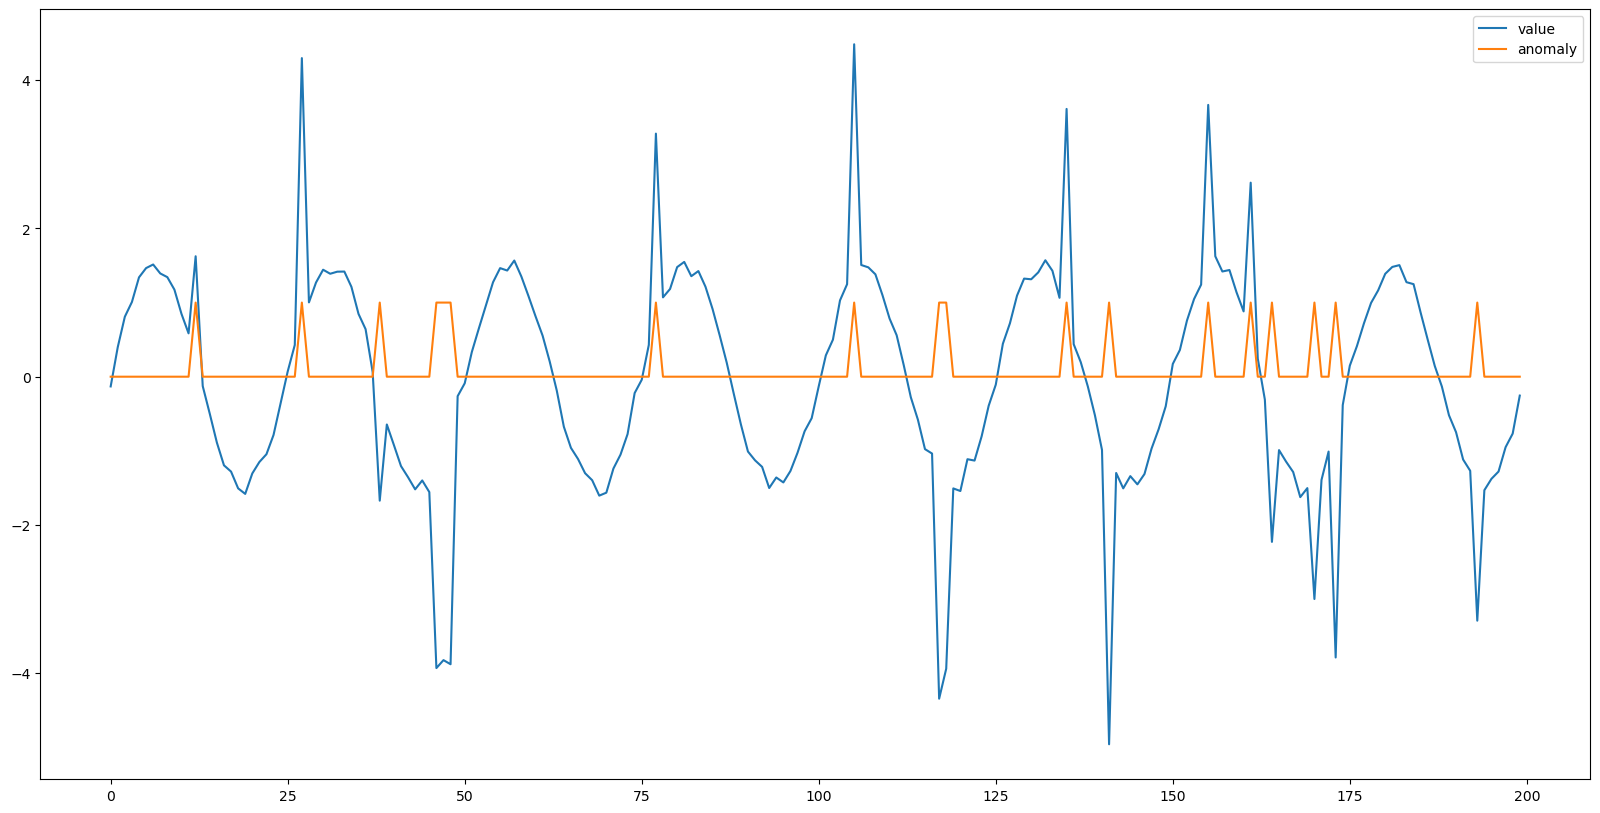

In [11]:
df.plot()

In [12]:
df.index.name = "timestamp"
df = df.rename(columns={"anomaly": "is_anomaly"})
df = df.reset_index()
df

,value,is_anomaly
timestamp,,
0,-0.131232,0
1,0.398736,0
2,0.809108,0
3,1.007888,0
4,1.340091,0
...,...,...
195,-1.377897,0
196,-1.279601,0
197,-0.950526,0
